<a href="https://colab.research.google.com/github/LilianeEff/Data110/blob/main/Week10hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data110/refs/heads/main/Dataset/Daily_Arrests.csv')
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,PACHECO LUNA,DARWIN,NaN,48,NO FIXED ADDRESS,Wheaton Hills,MD,10/19/2024,FAILURE TO PAY APPLICABLE FARE
1,DIAZ FERNANDEZ,JULIO,NaN,29,10200 Block Of COBELEDGE CT,Montgomery Village,MD,10/19/2024,"(DRIVING, ATTEMPTING TO DRIVE) VEHICLE WHILE U..."
2,MAJORS,ZACCHAEUS,NaN,42,8100 Block Of GEORGIA AVE,SILVER SPRING,MD,10/19/2024,TRESPASS: PUBLIC AGENCY DURING BUSINESS HOURS
3,ARAIA,BILEN,TESTAMARIAM,32,4100 Block Of Shadow Brook Ln,Olney,MD,10/19/2024,KNOWINGLY DRIVING UNINSURED VEHICLE
4,JUVENILE,JUVENILE,JUVENILE,17,8100 Block Of BROADVIEW DR,FREDERICK,MD,10/19/2024,ARMED CARJACKING


In [10]:
#1. **Filter Theft-Related Offenses**
  # - Filter the dataset to include only rows where the `OFFENSE` column contains the word "theft".
   #- Create a new DataFrame called `theft_df` for this filtered data.

theft_df=df[df['OFFENSE'].str.contains('THEFT', case=False)]
theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
14,VEST,ZAND,GILBERT,50,NO FIXED ADDRESS,BETHESDA,MD,10/21/2024,"THEFT: $100 TO UNDER $1,500"
15,PRINGLE,AARION,NaN,26,4900 Block Of C ST,Washington D.C.,DC,10/21/2024,"THEFT: $100 TO UNDER $1,500"
19,ORDONEZ,ISRAEL,DE JESUS,25,8700 Block Of carroll ave,SILVER SPRING,MD,10/21/2024,"THEFT: $100 TO UNDER $1,500"
20,WRIGHT,BRANDI,MARIE,43,NO FIXED ADDRESS,ROCKVILLE,MD,10/21/2024,"THEFT: $1,500 TO UNDER $25,000"
26,DICKERSON,STEVEN,SIMS,37,8800 Block Of PLYMONTH ST,SILVER SPRING,MD,10/22/2024,"THEFT: $100 TO UNDER $1,500"


In [11]:


#2. **Exploratory Data Analysis (EDA)**

   #- **Task**: Answer the following questions:
    # - What is the total number of theft incidents?
total_theft_incidents=len(theft_df)
print(f'Total number of theft incidents: {total_theft_incidents}')

     #- What is the range of ages involved in theft offenses?
age_range=theft_df['AGE'].min(), theft_df['AGE'].max()
print(f"Range of ages involved in theft offenses:{age_range}")


Total number of theft incidents: 81
Range of ages involved in theft offenses:(18, 69)


In [12]:
#3. **Visualizing Theft Offenses by Day of the Week**

   #   - **Task**: Which day of the week has the highest number of theft arrests?
daily_theft=theft_df['ARREST DATE'].value_counts()
print(daily_theft)
# The day of the week with the highest arrest has been friday with 7 arrests


ARREST DATE
11/15/2024    7
10/21/2024    6
10/24/2024    6
11/01/2024    5
11/14/2024    5
11/04/2024    5
10/30/2024    4
11/02/2024    4
11/07/2024    4
11/08/2024    4
11/11/2024    4
10/25/2024    4
11/16/2024    4
10/28/2024    3
10/22/2024    3
10/27/2024    2
10/26/2024    2
11/10/2024    2
11/12/2024    2
11/13/2024    2
10/23/2024    2
11/06/2024    1
Name: count, dtype: int64


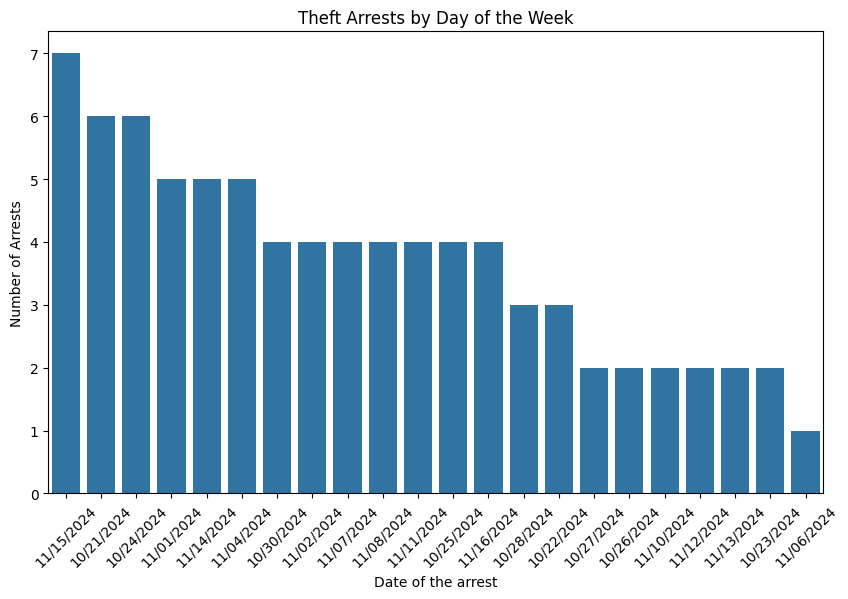

In [13]:
 #What might be the reasons for this trend?
 plt.figure(figsize=(10, 6))
 sns.barplot(x=daily_theft.index, y=daily_theft.values)
 plt.xlabel('Date of the arrest')
 plt.ylabel('Number of Arrests')
 plt.title('Theft Arrests by Day of the Week')
 plt.xticks(rotation=45)
 plt.show()

The fifteen fell on a Friday, so it would make sense that there would be a lot more arrests  on that day.  A lot of people go out on Friday nights to unwind after a long week of work. This might prompt others to think of ways to rob them, whether it be by breaking into their homes while they're not there, or jumping them on the street because they are there.


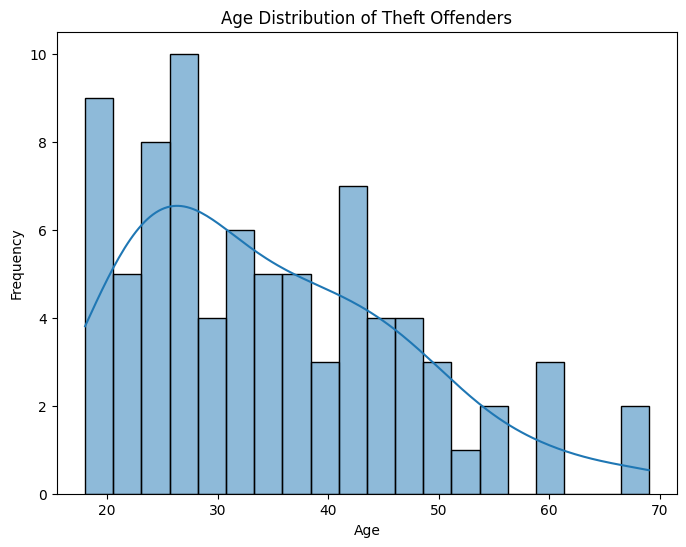

In [14]:
#4. **Age Distribution of Theft Offenders**

   #- **Task**: Describe the age distribution.
plt.figure(figsize=(8, 6))
sns.histplot(theft_df['AGE'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Theft Offenders')
plt.show()

According to this KDE, the frequency of the thieves' ages tends to be centered around people ranging from their twenties to their forties, then we see a shift towards less criminal inclination. This makes sense since younger people have more energy to undertake action that they might feel they need to, while older people have more experience dealing with consequences, and are wise enough to not want to jeopardize their freedom.

In [15]:
#Which age group seems to be most involved in theft offenses?
age_counts=theft_df['AGE'].value_counts()
print(age_counts)
#people with ages ranging from 25-26 seem to be the biggest offenders.

AGE
26    8
25    6
32    4
35    3
18    3
41    3
19    3
20    3
21    3
45    3
42    3
34    2
54    2
29    2
24    2
31    2
30    2
39    2
48    2
36    2
69    2
47    2
37    2
28    2
59    1
61    1
40    1
50    1
60    1
46    1
49    1
38    1
51    1
53    1
23    1
43    1
22    1
Name: count, dtype: int64


OFFENSE
THEFT: $100 TO UNDER $1,500                41
THEFT LESS THAN $100.00                    16
THEFT: $1,500 TO UNDER $25,000             15
THEFT SCHEME: $1,500 TO UNDER $25,000       3
THEFT: $25,000 TO UNDER $100,000            2
CON-THEFT: $100 TO UNDER $1,500             1
THEFT SCHEME: $25,000 TO UNDER $100,000     1
THEFT SCHEME: $100 TO UNDER $1,500          1
THEFT SCHEME: $100,000 PLUS                 1
Name: count, dtype: int64


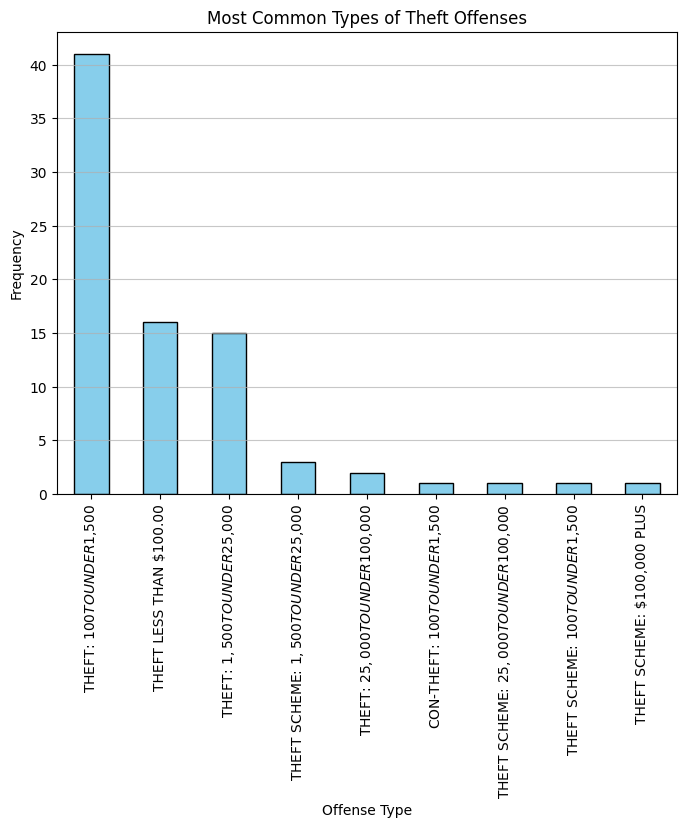

In [16]:
#5. **Offense Analysis**
  # - Analyze the types of theft offenses.
   #- **Task**: Use `value_counts()` on the `OFFENSE` column to find out what
   #kinds of theft are most common. Create a bar chart to visualize this.

offense_counts = theft_df['OFFENSE'].value_counts()

print(offense_counts)

plt.figure(figsize=(8, 6))
offense_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Most Common Types of Theft Offenses')
plt.xlabel('Offense Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.show()

Thefts ranging from $$100 to $1500 worth are the most common for real theft, while the lowest ranking so far is a theft scheme of over $100,000. The perpretrator only dreamed of getting their hands on that money, but this looks like it never got realized.

CITY
SILVER SPRING       23
ROCKVILLE           17
Washington D.C.     11
GAITHERSBURG         4
GERMANTOWN           4
BETHESDA             3
WASHINGTON           3
DISTRICT HEIGHTS     2
TAKOMA PARK          2
Oxon Hill            2
FALLING WATERS       1
WHEATON              1
LAUREL               1
Potomac              1
BROOKEVILLE          1
Cabin John           1
FREDERICK            1
Damascus             1
Centerville          1
Burtonsville         1
Name: count, dtype: int64


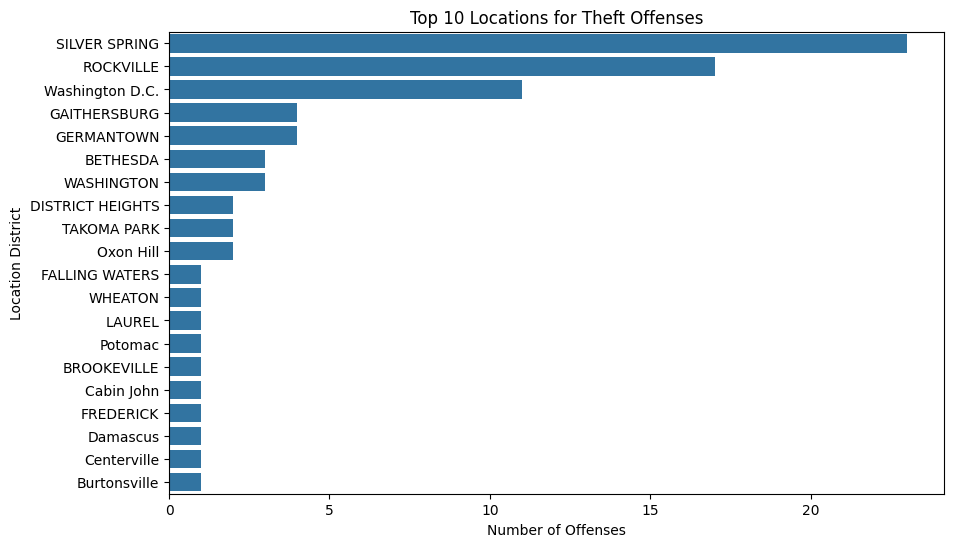

In [17]:
#6. Can you make some other visualization related to theft offenses?
# I can sure try. Let's see if we can see if there are more offenses in certain locations vs. others:
location_counts = theft_df['CITY'].value_counts()

print(location_counts)
plt.figure(figsize=(10, 6))
sns.barplot(y=location_counts.index, x=location_counts.values, orient='h')
plt.title('Top 10 Locations for Theft Offenses')
plt.xlabel('Number of Offenses')
plt.ylabel('Location District')
plt.show()

I am appaled to see that Silver Spring ranks as the highest city in this dataset in terms of arrests since I live here. It does not come as much of a surprise seeing that the sheer size of Silver Spring is enormous. There would be more opportunities for isolated incident when there is a bigger area to cover.

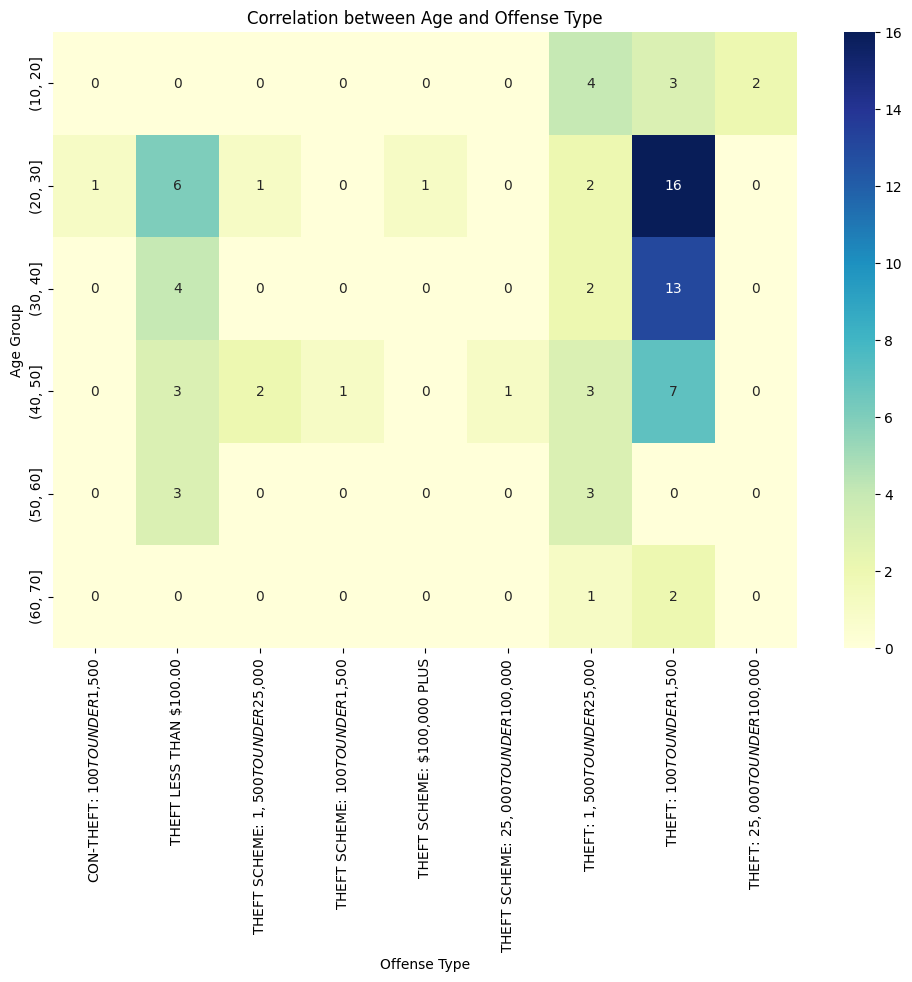

In [18]:
#Let's see a correlated heatmap between ages of offenders and the type of theft they commit:

age_offense_cross_tab = pd.crosstab(pd.cut(theft_df['AGE'], bins=range(0, 100, 10)), theft_df['OFFENSE'])

plt.figure(figsize=(12, 8))
sns.heatmap(age_offense_cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Correlation between Age and Offense Type')
plt.xlabel('Offense Type')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.show()

Just like we saw before, the heatmap confirms that the biggest offenders fall in between the ages of 25-45. The highest theft commited by people who fall under that category is valued at $100-1500, with people in the 20-30 age bracket committing more of it than their older counterparts.

<ipython-input-20-c997047ac70b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-20-c997047ac70b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['DayOfWeek'] = theft_df['ARREST DATE'].dt.dayofweek


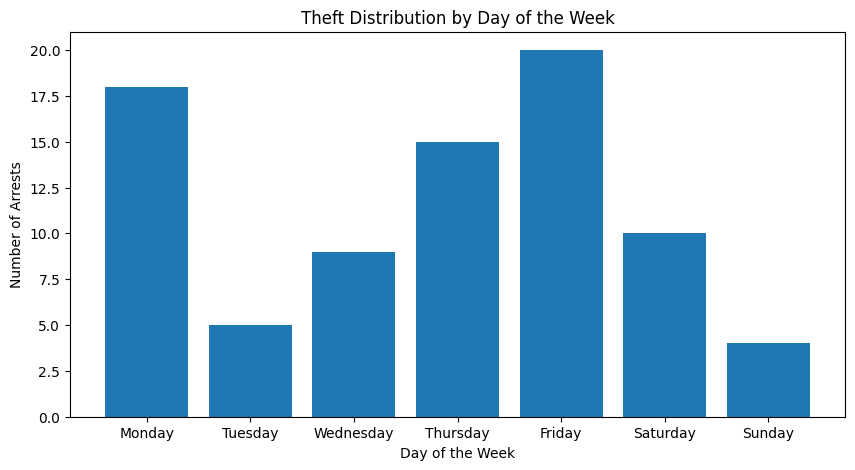

In [20]:
import pandas as pd

# Convert 'ARREST DATE' to datetime objects
theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])

# Now you can access the day of the week
theft_df['DayOfWeek'] = theft_df['ARREST DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = theft_df.groupby('DayOfWeek')['ARREST DATE'].count()

# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.title("Theft Distribution by Day of the Week")
plt.show()